# Rekonstrukcja obiektów 3D
Zadanie rekonstrukcji obiektów 3D polega na uchwyceniu kształtu i wyglądu prawdziwych przedmiotów.

Tematyka rekonstrukcji obiektów 3D obejmuje zarówno klasyczne metody takie jak wykorzystanie echosondy do rekonstrukcji terenu, jak i rekonstrukcję obiektu z samych jego obrazów. W tym notebooku skupimy się na tych drugich i przedstawimy następujące metody:
 - Fotogrametrię;
 - Neural Radiance Fields.
 - Gaussian Splatting;


<center>
    <figure>
        <img src="https://github.com/Knowledge-Sharing-Seminars/l05-rafak1/blob/main/grafika/echo_sounding.jpg?raw=1" width="400">
            <figcaption>Fig. 1: Tworzenie obrazu dna przez echosondę (<a href="https://en.wikipedia.org/wiki/Echo_sounding">źródło</a>)
            </figcaption>
    </figure>
</center>

# Fotogrametria

Fotogrametria (ang. photogrammetry) to technika polegająca na pozyskiwaniu informacji o obiektach i ich położeniu w przestrzeni na podstawie zdjęć lub skanów. Dzięki tej metodzie możliwe jest tworzenie precyzyjnych modeli 3D, map oraz pomiarów i scen na podstawie zdjęć wykonanych z różnych perspektyw. Wykorzystuje ona zasady geometrii oraz techniki obróbki obrazu, pozwalając na dokładne odtworzenie kształtów i struktury obiektów w cyfrowej przestrzeni.

<center>
    <figure>
        <img src="https://github.com/Knowledge-Sharing-Seminars/l05-rafak1/blob/main/grafika/photogrammetry.png?raw=1" width="1080">
    </figure>
</center>




<div style="text-align: center;">
    <table style="width: 100%; table-layout: fixed;">
        <tr>
            <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l05-rafak1/blob/main/grafika/triangulation1.png?raw=1" alt="Image 1" style="width: 90%; border: 1px solid #ddd;"/></td>
            <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l05-rafak1/blob/main/grafika/triangulation2.png?raw=1" alt="Image 2" style="width: 90%; border: 1px solid #ddd;"/></td>
        </tr>
    </table>
    <p style="text-align: center; font-style: italic">Fotogrametria opiera się na triangulacji, czyli określaniu położenia punktu w przestrzeni na podstawie jego położenia na co najmniej dwóch zdjęciach wykonanych pod różnym kątem. Oprogramowanie analizuje te zdjęcia, identyfikuje wspólne punkty i oblicza ich dokładną pozycję w przestrzeni 3D.</p>
</div>

<center>
    <figure>
        <img src="https://github.com/Knowledge-Sharing-Seminars/l05-rafak1/blob/main/grafika/photogrammetry_scene.png?raw=1" width="1080">
            <figcaption>Scena odwzorowana za pomocą fotogrametrii
            </figcaption>
    </figure>
</center>

Przykładowe zastosowania to:
- Tworzenie dokładnych map terenu i modeli budynków.
- Dokumentowanie i analiza zabytków oraz stanowisk archeologicznych.
- Tworzenie modeli konstrukcji i monitorowanie ich stanu.

Ograniczenia:
- Wraźliwość na warunki oświetleniowe
- Nie obwzorowuje głękokich obiektów, które stanowią tło sceny, np. niebo.

<br /> <br />
<br /> <br />
<br /> <br />
<br /> <br />


# Neural Radiance Fields (NeRF)

### Spis treści
1. [Wstęp](#wstep)
2. [Dygresja: Volume Rendering](#volume-rendering)
3. [Działanie NeRF](#dzialanie)
    1. [Zadanie 1](#z1)
    2. [Zadanie 2](#z2)
4. [Przykład działania NeRF](#przyklad)
5. [Optymalizacje NeRF](#optymalizacja)
6. [Implementacja](#implementacja)
7. [Wyniki](#wyniki)
8. [Podsumowanie](#podsumowanie)


### Wstęp <a name="wstep"></a>

<center>
    <figure>
        <video src="grafika/orchid.mp4" width="300" autoplay controls loop></video>
        <video src="grafika/redtoyota.mp4" width="300" autoplay controls loop></video>
        <video src="grafika/colorspout_200k_rgb.mp4" width="300" autoplay controls loop></video>
        <figcaption>
            Fig. 1: rendery stworzone za pomocą NeRF (<a href="https://www.matthewtancik.com/nerf">źródło</a>)
        </figcaption>
    </figure>
</center>

Zadaniem Neural Radiance Fields jest generowanie nowych widoków złożonych scen na podstawie ograniczonego zbioru jego obrazów. Działa optymalizując parametry ciągłej reprezentacji sceny w 5D na podstawie zbioru zadanych obrazów, gdzie reprezentacją jest sieć fully-connected.

Na wejściu przyjmuje piątkę: $x$, $y$, $z$ (współrzędne w przestrzeni) oraz $\theta$, $\phi$ (kierunek patrzenia).

Na wyjściu sieć zwraca gęstość i *radiance* w punkcie wejściowym, z których za pomocą technik *Volume Rendering* możemy wyrenderować obraz 2D.

<center>
    <figure>
        <img src="https://github.com/Knowledge-Sharing-Seminars/l05-rafak1/blob/main/grafika/nerf_schemat.png?raw=1" height="300"/>
        <figcaption>
            Fig. 2: ogólny schemat działania NeRF (<a href="https://arxiv.org/pdf/2003.08934">źródło</a>)
        </figcaption>
    </figure>
</center>

### Dygresja: Volume Rendering <a name="volume-rendering"></a>
W przypadku Volume Rendering obiekt jest reprezentowany jako dyskretny, zbiór próbek punktów 3D. Podstawowym elementem gęstości jest voxel, który odpowiada danemu punktowi w przestrzeni 3D i może posiadać takie właściwości jak kolor i przezroczystość.

Na podstawie takich danych jesteśmy w stanie wyrenderować obraz 2D obiektu.

Wykorzystywane jest m.in. do renderowania obrazów z tomografii komputerowej, która mierzy gęstość w równych odstępach.

<center>
    <figure>
        <img src="https://github.com/Knowledge-Sharing-Seminars/l05-rafak1/blob/main/grafika/tomografia.jpg?raw=1" height="300"/>
        <figcaption>
            Fig. 3: render tomografii komputerowej stworzony metodami Volume Rendering  (<a href="https://en.wikipedia.org/wiki/Volume_rendering">źródło</a>)
        </figcaption>
    </figure>
</center>

Więcej na ten temat: https://developer.nvidia.com/gpugems/gpugems/part-vi-beyond-triangles/chapter-39-volume-rendering-techniques

### Działanie NeRF <a name="dzialanie"></a>

Aby wyrenderować obraz sceny z danej kamery, musimy ustalić kolor pixeli dla każdego pixela na docelowym obrazie.

*Neural Radiance Field* są renderowane z danego punktu widzenia w następujący sposób:
1. Dla każdego pixela, otrzymujemy promień kamery o początku w pixelu i skierowanym na scenę.
2. Promienie kamery, przechodząc przez scenę, generują próbkę punktów 3D ze sceny.
3. Punkty i odpowiadające im kierunki są podawane na wejściu do sieci, zwracając zbiór kolorów i gęstości.
4. Za pomocą technik *volume rendering* z danych tworzony jest obraz 2D.

Ponieważ ten proces jest różniczkowalny, można wykorzystać gradient descent, aby zminimalizować błąd pomiędzy prawdziwymi obrazami, a renderami na podstawie danych z sieci neuronowej.

***

Sceny są reprezentowane jako 5-argumentowe funkcje, których wejście to współrzędne $x = (x, y, z)$ oraz kierunek patrzenia $(\theta, \phi)$, a wyjście to kolor $c = (r, g, b)$ i gęstość objętości $\sigma$.

Zadaniem NeRF jest optymalizacja funkcji:
$$ F_{\Theta}: (x, d) \rightarrow (c, \sigma)$$
poprzez optymalizację wag $\Theta$.

<center>
    <figure>
        <img src="https://github.com/Knowledge-Sharing-Seminars/l05-rafak1/blob/main/grafika/nerf_detailed.png?raw=1" height="300"/>
        <figcaption>
            Fig. 4: schemat renderowania kolorów przez NeRF (<a href="https://arxiv.org/pdf/2003.08934">źródło</a>)
        </figcaption>
    </figure>
</center>

Gęstość $\sigma$ jest przewidywana tylko na podstawie $x$, a kolor $c$ na podstawie $x$ oraz $(\theta, \phi)$, ponieważ gęstość nie powinna być zależna od kierunku z którego patrzymy. W zależności od punktu patrzenia, może się zmieniać kolor np. z powodu tego jak odbija się światło, co widać na przykładzie:

<center>
    <figure>
        <img src="https://github.com/Knowledge-Sharing-Seminars/l05-rafak1/blob/main/grafika/nerf_color.png?raw=1" height="300"/>
        <figcaption>
            Fig. 5: przykład gdzie dla dwóch różnych punktów widzenia ten sam punkt ma różne kolory  (<a href="https://arxiv.org/pdf/2003.08934">źródło</a>)
        </figcaption>
    </figure>
</center>

Oczekiwany kolor $C(r)$ promienia kamery $r(t) = o + td$, ograniczonego przez $t_n$ (początek promienia w kamerze) i $t_f$ (koniec sceny) to:

$$C(r) = \int_{t_n}^{t_f} T(t) \sigma(r(t)) c(r(t), d) dt \text{, gdzie } T(t) = \exp(- \int_{t_n}^{t} \sigma(r(s)) ds) $$

Zamiast liczyć $C(r)$ bezpośrednio, całka jest szacowana poprzez [kwadraturę](https://pl.wikipedia.org/wiki/Kwadratury_Gaussa), gdzie $[t_n, t_f]$ jest dzielone na $N$ równych koszy, z których wybierane są losowo jednostajnie próbki. Daje to wzór:

$$ \hat{C}(r) = \Sigma_{i=1}^{N} T_i (1 - \exp(-\sigma_{i}\delta_{i})) c_i \text{, gdzie } T_i = \exp(- \Sigma_{j=1}^{i-1}(\sigma_{j} \delta_{j})) $$

gdzie $\delta_{i} = t_{i+1} - t_{i}$, czyli odległość między sąsiednimi próbkami.

### Zadanie 1 (oceniane): <a name="z1"></a>
Jaka intuicja stoi za funkcją $T(t)$? Jaki ma wpływ na ostateczną wartość $C(r)$?

Odpowiedź

T(t) to miara ile światła 'przetrwa' podróżując promieniem do czasu t. Jest tak gdyż sumujemy gęstości obiektów na każdym punkcie promienia od startu do czasu t. Wartość T(t) dyktuje jak dużą częścią wyniku będzie kolor c(r(t),d), czyli kolor punktu na promieniu r(t).

### Zadanie 2 (nieobowiązkowe): <a name="z2"></a>
Wzór na $C(r)$ możemy zredukować do *alpha compositing*. Czym jest *alpha compositing* i jaką wartość $\alpha$ otrzymamy przy redukcji $C(r)$?

*miejsce na odpowiedź*

### Przykład działania NeRF <a name="przyklad"></a>

Poniższy kod zawiera przykładową implementacje powyższych wzorów. Nazwy zmiennych zachowują jednolitość z wzorami dla łatwości analizy.

Jako uproszczenie, MLP traktujemy jako czarną skrzynkę, która przyjmuje wejście i zwraca wyjście w odpowiednim formacie (w tym przypadku losowe wartości).

Losowe dane nie oddają dobrze tego jak renderowane są obiekty w rzeczywistości, ale pozwalają nam pokazać schemat działania NeRF.

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

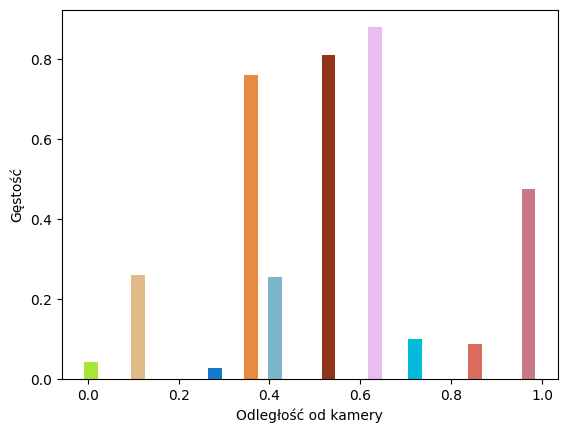

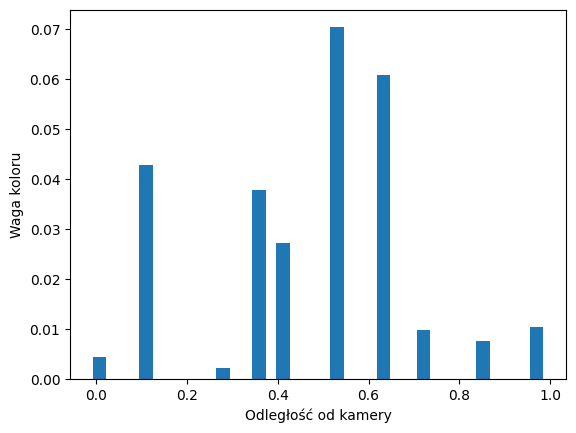

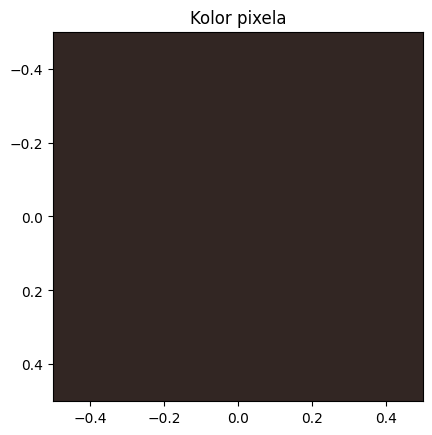

In [ ]:
class MockedNeRF:
    """
    Mock implementation of NeRF. Takes in standard NeRF input and outputs standard NeRF output.

    Please pretend that we are actually running a trained MLP here.
    """
    def getDensity(self) -> np.array:
        return np.random.rand()

    def getColor(self) -> np.array:
        return np.random.rand(3)

    def predict(self, x: np.array, theta: np.array, phi: np.array) -> np.array:
        return self.getDensity(), self.getColor()

nerf = MockedNeRF()

# Number of samples for one ray
N = 10

# Start time of ray
t_n = 0.0

# End time of ray
t_f = 1.0

# Camera properties (camera ray origin point)
origin = np.array([2.0, 2.0, 2.0])

# Camera propertires (camera ray viewing angle)
theta = np.pi / 3
phi = np.pi / 3

# We need to convert Spherical coordinates to Cartesian coordinates
ray = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])

# Create bins and choose a value uniformly at random from each bin
bins = np.linspace(t_n, t_f, N+1)
sample_points = np.zeros(N)
for i in range(N):
    sample_points[i] = np.random.uniform(bins[i], bins[i+1])

# Get density, color for each sample
sample_densities = np.zeros(N)
sample_colors = np.zeros((N, 3))
for i in range(N):
    density, color = nerf.predict(origin + sample_points[i] * ray, theta, phi)
    sample_densities[i] = density
    sample_colors[i] = color


# Calculate the final color
deltas = np.zeros(N)
for i in range(N-1):
    deltas[i] = sample_points[i+1] - sample_points[i]
deltas[N-1] = t_f - sample_points[N-1]

T = np.ones(N)
for i in range(1, N):
    T[i] = np.exp(-np.sum(sample_densities[:i] * deltas[:i]))

weights = T * (1 - np.exp(-sample_densities * deltas))
C_hat = np.sum((weights).reshape(N, 1) * sample_colors, axis=0)

plt.bar(sample_points, sample_densities, width=0.03, color=sample_colors)
plt.xlabel("Odległość od kamery")
plt.ylabel("Gęstość")
plt.show()

plt.bar(sample_points, weights, width=0.03)
plt.xlabel("Odległość od kamery")
plt.ylabel("Waga koloru")
plt.show()

plt.imshow(C_hat.reshape(1, 1, 3))
plt.title("Kolor pixela")
plt.show()


### Optymalizacje NeRF <a name="optymalizacja"></a>

Sama powyżej opisana metoda nie jest wystarczająca, aby otrzymywać state-of-the-art wyniki dla złożonych scen, dlatego NeRF wprowadza również dwóch ulepszeń do swojej metody.

***

**Positional Encoding**

Oryginalna funckja $F_{\Theta}$ operuje bezpośrednio na $xyz\theta\phi$, co nie sprawdza się gdy geometria i kolor zmieniają się z wysoką częstotliwością w scenie, dlatego reformułują $F_{\Theta}$ jako złożenie:
$$ F_{\Theta} = F_{\Theta}' \circ \gamma $$
gdzie $F_{\Theta}'$ jest regularnym MLP, a $\gamma$ jest mapowaniem z $\R$ do $\R^{2L}$:
$$ \gamma(p) = (\sin (2^0 \pi p), \cos (2^0 \pi p), ..., \sin (2^{L-1} \pi p), \cos (2^{L-1} \pi p)) $$
gdzie $L = 10$ dla $\gamma(x)$ i $L = 4$ dla $\gamma(d)$.

***

**Hierarchical Volume Sampling**

Przedstawiona strategia równomiernego próbkowania punktów wzdłuż promieni jest nieefektywna, ponieważ znaczna część próbek będzie albo w pustej przestrzeni, albo w przestrzeni zasłoniętej przez inne obiekty, dlatego więcej próbek powinno być przydzielonych do regionów, które będą miały większy wpływ na ostateczny render.

Rozwiązaniem jest trenowanie dla każdej sceny dwóch sieci: ogólnej i dokładnej.

Sieć ogólna wybiera próbki według oryginalnej strategii. Możemy przepisać wzór na kolor otrzymany z tej sieci jako:

$$ \hat{C}_C(r) = \sum_{i=1}^{N_c} w_i c_i, w_i = T_i(1 - \exp( - \sigma_i \delta_i)) $$

Następnie normalizując $w_i$ otrzymujemy funkcję gęstości prawdopodobieństwa dla każdego kosza wzdłuż promienia. Sieć dokładna dokonuje próbkowania w $N_f$ miejscach według tego rozkładu, dzięki czemu kosze, które mają większy wpływ na ostateczny kolor mają większe prawdopodobieństwo zostania wybranymi. Ostateczny render wykorzystuje próbki zarówno z ogólnej, jak i dokładnej sieci, co daje w sumie $N_c + N_f$ próbek, ale ewaluuje je tylko dla sieci dokładnej.

### Implementacja <a name="implementacja"></a>

Do wytrenowania modelu dla danej sceny potrzebny jest zbiór zdjęć RGB oraz odpowiadających im parametrów opisujących położenie kamery, z której dane zdjęcie zostało zrobione. Dla danych ze świata rzeczywistego nie jest możliwe dostarczenie danych kamery, dlatego są estymowane za pomocą [COLMAP](https://github.com/colmap/colmap).

Jako loss function wykorzystywany jest total squared error:
$$ L = \sum_{r \in R} [\| \hat{C}_c(R) - C(r) \|_{2}^{2} + \| \hat{C}_f(r) - C(r) \|_{2}^{2}]$$
gdzie $C(r)$ - ground truth, $\hat{C}_c(r)$ - predykcja sieci ogólnej, $\hat{C}_f(r)$ - predykcja sieci dokładnej.


### Wyniki <a name="wyniki"></a>

Następujące wyniki pochodzą z [oryginalnej pracy na temat NeRF](https://arxiv.org/pdf/2003.08934). Autorzy porównują NeRF z wynikami otrzymanymi przez:
 - Neural Volumes (NV)
 - Scene Representation Networks (SRN)
 - Local Light Field Fusion (LLFF)

na zbiorach danych zawierających syntetyczne rendery obiektów ("Diffuse Synthetic 360◦", "Realistic Synthetic 360◦") oraz prawdziwych obrazach złożonych scen ("“Real ForwardFacing").

Do porównania wykorzystują poznane przez nas wcześniej metryki:
 - PSNR (wyższe = lepiej),
 - SSIM (wyższe = lepiej),
 - LPIPS (niższe = lepiej).

<center>
    <figure>
        <img src="https://github.com/Knowledge-Sharing-Seminars/l05-rafak1/blob/main/grafika/nerf_results.png?raw=1" height="300"/>
        <figcaption>
            Fig. 6: porównanie wyników NeRF z innymi metodami rekonstrukcji 3D  (<a href="https://arxiv.org/pdf/2003.08934">źródło</a>)
        </figcaption>
    </figure>
</center>

<center>
    <figure>
        <img src="https://github.com/Knowledge-Sharing-Seminars/l05-rafak1/blob/main/grafika/nerf_results_view.png?raw=1"/>
        <figcaption>
            Fig. 7: porównanie renderów NeRF z innymi metodami rekonstrukcji 3D na syntetycznych scenach (<a href="https://arxiv.org/pdf/2003.08934">źródło</a>)
        </figcaption>
    </figure>
</center>

<center>
    <figure>
        <img src="https://github.com/Knowledge-Sharing-Seminars/l05-rafak1/blob/main/grafika/nerf_results_view_2.png?raw=1"/>
        <figcaption>
            Fig. 8: porównanie renderów NeRF z innymi metodami rekonstrukcji 3D na scenach ze świata rzeczywistego (<a href="https://arxiv.org/pdf/2003.08934">źródło</a>)
        </figcaption>
    </figure>
</center>

### Podsumowanie <a name="podsumowanie"></a>

Neural Radiance Fields są w stanie generować realistyczne, nowe widoki scen na podstawie ich obrazów. Osiągają state-of-the-art wyniki, często nierozróżnialne od prawdziwego zdjęcia. Jako, że NeRF trzyma model sceny w wagach MLP po przetrenowaniu sieci jesteśmy w stanie generować widoki sceny z dowolnej perspektywy.

Zalety:
 - generuje realistyczne obrazy, często nierozróżnialne od rzeczywistości;
 - trenowanie modelu odbywa się raz po czym możemy generować widoki z dowolnej perspektywy;
 - do wytrenowania modelu wystarczą zdjęcia sceny

Wady:
 - w celu otrzymania dobrych wyników konieczne jest przygotowanie dużej ilości zdjęć sceny do treningu;
 - czas trenowania jest długi, autorom pracy trenowanie dla pojedynczej sceny zajęło średnio 1-2 dni na NVIDIA V100 GPU;
 - wymagania obliczeniowe NeRF nie pozwalają na renderowanie w czasie rzeczywistym.

Autorzy pracy rozwinęli NeRF, m.in. pozwalając na renderowanie scen pod arbitralnym oświetleniem:
<center>
    <figure>
        <video src="grafika/nerv_results.mp4" height="300" autoplay controls loop></video>
        <figcaption>
            Fig. 9: sceny wyrenderowane przez NeRF pod arbitralnym oświetleniem (<a href="https://www.matthewtancik.com/nerf">źródło</a>)
        </figcaption>
    </figure>
</center>



Zachęcamy do zapoznania się ze stroną projektu, która zawiera liczne wizualizacje, część których zamieściliśmy w tym notebooku:
https://www.matthewtancik.com/nerf

<br /> <br /> <br /> <br />
<br /> <br />
<br /> <br />
<br /> <br />



# Gaussian Splatting (GS) <a name="wstep"></a>

### Spis treści
1. [Wstęp](#wstep)
2. [GS vs Nerf](#por)
3. [Data processing](#ds)
4. [Algorytm treningu](#tr)
5. [Rasteryzacja](#ra)
6. [Densyfikacja i pruning](#densyfikacja)
7. [Implementacja](#implementacja)
8. [Wyniki](#wyniki)
9. [Zadanie 3](#z3)
10. [Zadanie 4](#z4)
11. [Podsumowanie](#pod)



## Wstęp <a name="wstep"></a>
<center>
    <figure>
        <img src="https://github.com/Knowledge-Sharing-Seminars/l05-rafak1/blob/main/grafika/gs.png?raw=1" width="1080"> <br /> Pipeline przedstawiający działanie Gaussian Splatting (<a href="https://huggingface.co/blog/gaussian-splatting">źródło</a>)
    </figure>
</center>

Gaussian Splatting polega na reprezentowaniu obiektu za pomocą zbioru punktów przekształconym do tzw. splatów, z których każdy opisany jest przez rozkład Gaussa. Każdy punkt splat charakteryzuje się kilkoma atrybutami:
- Pozycja (mean): współrzędne w przestrzeni 3D (XYZ)
- Macierz kowariancji: rozciąganie/skalowanie ($\boldsymbol{\Sigma} \in \mathbb{R}^{3 \times 3}$ )
- Kolor (Spherical harmonics)
- Przezroczystość (α)


Macierz kowariancji w trójwymiarowym rozkładzie Gaussa jest analogiczna do opisu konfiguracji elipsoidy. Mając daną macierz skalowania S oraz macierz obrotu R, możemy znaleźć odpowiadającą im macierz:  ${\Sigma} = R S S^T R^T$ <br /> <br /><br />






## Porównanie względem NerF <a name="por"></a>

Ta metoda ma kilka zalet względem nerfów:
- Znacznie przyspiesza czas trenowania oraz inferencji, co pozwala na renderowanie w czasie rzeczywistym.
- Znacząco jest zmniejszony rozmiar modelu
- W stosunku do NeRF-a obiekty sceny istnieja "fizycznie", jako gaussy. Dzięki temu można łatwo edytować scenę, np. wyciąć lub przesunąć gaussy odpowiadające za dany obiekt: np. drzewo. <br /> <br />

Z kolei jeśli zależy nam na tym aby dobrze odwzorować obiekty półprzeźroczyste i odbicia światła, w np. w scenach przedstawiających szkło, mgłę, wypolerowane powierzchnie - NeRF będzie spisywać się lepiej. <br /><br /><br />

## Dataprocessing <a name="ds"></a>

Wystarczającymi danymi do wytrenowania modelu GS będzie nagranie np. z komórki, przedstawiające scenę pod różnymi kątami.

<center>
    <figure>
        <img src="https://github.com/Knowledge-Sharing-Seminars/l05-rafak1/blob/main/grafika/colmap.png?raw=1" width="1080">
                            <figcaption>        Wykorzystanie oprogramowania COLMAP do uzyskaniu chmury punktów na podstawie samych zdjęć (klatek) sceny  (<a href="https://colmap.github.io/">źródło</a>)
            </figcaption>
    </figure>
</center>

<center>
    <figure>
        <img src="https://github.com/Knowledge-Sharing-Seminars/l05-rafak1/blob/main/grafika/gs2.png?raw=1" width="1080">
                    <figcaption>        Na podstawie zdjęć z kamer jesteśmy w stanie przeprowadzić structure from motion i zainicjalizować pierwotną chmurę punktów, które później zamieniane są na splaty (<a href="https://huggingface.co/blog/gaussian-splatting">źródło</a>)
            </figcaption>
    </figure>
</center>

## Trening <a name="tr"></a>

Procedura treningowa wykorzystuje Stochastic Gradient Descent (SGD), podobnie jak w przypadku sieci neuronowych, ale wykorzystania warstw. Kroki treningowe są następujące:

- Rasteryzacja gaussów na obraz za pomocą różniczkowalnej rasteryzacji gaussowskiej (więcej o tym później).
- Obliczenie lossu na podstawie różnicy między zrasteryzowanym obrazem a ground truth.
- Dostosowanie parametrów gaussów zgodnie z obliczonym lossem.
- Zastosowanie automatycznej densyfikacji i pruningu.


### Rasteryzacja <a name="ra"></a>
Otrzymane splaty są rzutowane na płaszczyznę 2D z perspektywy wirtualnej kamery. Są następnie one sortowane na podstawie ich głębokości w przestrzeni 3D. Potem są łączone, aby utworzyć ostateczny obraz, gdzie splaty położone bliżej kamery mają priorytet nad tymi, które są dalej.
Na koniec ostateczny obraz jest renderowany, proces ten polega na łączeniu wartości kolorów rzutowanych splatów, które nakładają się na płaszczyźnie 2D, co daje wizualną reprezentację sceny z perspektywy kamery.

<div style="text-align: center;">
    <table style="width: 100%; table-layout: fixed;">
        <tr>
            <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l05-rafak1/blob/main/grafika/opacity0.png?raw=1" alt="Image 1" style="width: 90%; border: 1px solid #ddd;"/></td>
            <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l05-rafak1/blob/main/grafika/opacity1.png?raw=1" alt="Image 2" style="width: 90%; border: 1px solid #ddd;"/></td>
        </tr>
                            <figcaption>        
                </figcaption>
    </table>
     <p style="text-align: center; font-style: italic">Porównanie widoku sceny bez użycia przeźroczystości gaussów i z jej użyciem. (<a href="https://huggingface.co/blog/gaussian-splatting">źródło</a>)</p>
</div>

### Densyfikacja i pruning <a name="densyfikacja"></a>
Densyfikacja to proces zwiększania liczby i gęstości Gaussów w celu lepszego odwzorowania sceny. Adaptacyjnie wypełnia puste i niedorekonstruowane obszary oraz dzieli duże Gaussy na mniejsze w celu lepszego dopasowania. Pruning za usuwani3 zbędnych gaussów, które charakteryzują się bardzo wysokim poziomiem przeźroczystości

<center>
    <figure>
        <img src="https://github.com/Knowledge-Sharing-Seminars/l05-rafak1/blob/main/grafika/densification.png?raw=1" width="1080">
                            <figcaption>       Densifikacja na przykładzie under- i over-reconstruction (<a href="https://arxiv.org/pdf/2308.04079">źródło</a>)
            </figcaption>
    </figure>
</center>

### Gaussian Splatting - implementacja i trening <a name="implementacja"></a>

In [2]:
#Przygotowanie środowiska, syntax compatybilny z Collab
#!git clone --recursive https://github.com/graphdeco-inria/gaussian-splatting
#!pip install plyfile

%cd /content/gaussian-splatting
#!pip install /content/gaussian-splatting/submodules/diff-gaussian-rasterization
!pip install -q /content/gaussian-splatting/submodules/simple-knn

/content/gaussian-splatting
  Preparing metadata (setup.py) ... done


In [3]:
#Pobieramy przykładowe datasety, zawiarają one scenę truck i train

!wget -O dataset.zip https://repo-sam.inria.fr/fungraph/3d-gaussian-splatting/datasets/input/tandt_db.zip
!unzip dataset.zip -d ./dataset_folder

--2024-11-25 21:20:15--  https://repo-sam.inria.fr/fungraph/3d-gaussian-splatting/datasets/input/tandt_db.zip
Resolving repo-sam.inria.fr (repo-sam.inria.fr)... 138.96.1.1
Connecting to repo-sam.inria.fr (repo-sam.inria.fr)|138.96.1.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 682628995 (651M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>] 651.00M  7.28MB/s    in 71s     

2024-11-25 21:21:27 (9.19 MB/s) - ‘dataset.zip’ saved [682628995/682628995]

Archive:  dataset.zip
   creating: ./dataset_folder/db/drjohnson/
   creating: ./dataset_folder/db/drjohnson/images/
  inflating: ./dataset_folder/db/drjohnson/images/IMG_6292.jpg  
  inflating: ./dataset_folder/db/drjohnson/images/IMG_6293.jpg  
  inflating: ./dataset_folder/db/drjohnson/images/IMG_6294.jpg  
  inflating: ./dataset_folder/db/drjohnson/images/IMG_6295.jpg  
  inflating: ./dataset_folder/db/drjohnson/images/IMG_6296.jpg  
  inflating: ./dataset_folder/

In [4]:
!python train.py -s ./dataset_folder/tandt/train --eval #trenowanie datasetu przedstawiającego pociąg

2024-11-25 21:21:49.128825: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-25 21:21:49.148328: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-25 21:21:49.154087: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-25 21:21:49.167865: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-25 21:21:50.159095: W tensorflow/compiler/tf2

In [5]:
#wyrendetowanie widoków z wytrenowanej sceny
!python render.py -m ./output/74137b8d-5 #podmień nazwę folderu [hash] na taką, jaka występuje w Twoim przypadku

Looking for config file in ./output/74137b8d-5/cfg_args
Config file found: ./output/74137b8d-5/cfg_args
Rendering ./output/74137b8d-5
Loading trained model at iteration 30000 [25/11 22:11:48]
------------LLFF HOLD------------- [25/11 22:11:50]
Reading camera 301/301 [25/11 22:11:50]
Loading Training Cameras [25/11 22:11:50]
Loading Test Cameras [25/11 22:11:57]
Rendering progress: 100% 263/263 [01:59<00:00,  2.20it/s]
Rendering progress: 100% 38/38 [00:17<00:00,  2.18it/s]


<a name="wyniki"></a>

In [6]:
!python metrics.py -m ./output/74137b8d-5 #podmień nazwę folderu [hash] na taką, jaka występuje w Twoim przypadku


Scene: ./output/74137b8d-5
Method: ours_30000
Metric evaluation progress:   0% 0/38 [00:00<?, ?it/s]Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth

  0% 0.00/528M [00:00<?, ?B/s]
  2% 11.5M/528M [00:00<00:04, 120MB/s]
  6% 29.9M/528M [00:00<00:03, 163MB/s]
  9% 48.5M/528M [00:00<00:02, 177MB/s]
 13% 67.1M/528M [00:00<00:02, 184MB/s]
 16% 85.0M/528M [00:00<00:02, 185MB/s]
 20% 104M/528M [00:00<00:02, 188MB/s] 
 23% 122M/528M [00:00<00:02, 162MB/s]
 26% 138M/528M [00:00<00:02, 161MB/s]
 29% 155M/528M [00:00<00:02, 167MB/s]
 32% 171M/528M [00:01<00:02, 167MB/s]
 35% 187M/528M [00:01<00:02, 167MB/s]
 39% 205M/528M [00:01<00:01, 171MB/s]
 42% 221M/528M [00:01<00:01, 166MB/s]
 45% 239M/528M [00:01<00:01, 173MB/s]
 49% 257M/528M [00:01<00:01, 177MB/s]
 52% 275M/528M [00:01<00:01, 180MB/s]
 55% 292M/528M [00:01<00:01, 177MB/s]
 59% 310M/528M [00:01<00:01, 176MB/s]
 62% 326M/528M [00:02<00:01, 166MB/s]
 65% 342M/52

## Wyniki i przegląd sceny

Jako wynik powinniśmy otrzymać 25 PSNR (wyższe = lepiej), mamy podane także metryki SSIM (wyżssze = lepiej) oraz LPIPS (niższe = lepiej).

Wytrenowaną scenę mozna obejrzec m.in w online viewerze: ( https://antimatter15.com/splat/ )
Wystarczy przeciagajac plik .splat (./output/[hash]/point_cloud/iteration_[number_of_iterations]/point_cloud.ply)do przegladarki z otwartą witryną.




### Zadanie 3. (obowiązkowe) <a name="z3"></a>
Zmień poziom densyfikacji korzystając z dokumentacji https://github.com/graphdeco-inria/gaussian-splatting/blob/main/README.md i wytrenuj model.
Porównaj z poprzednim treningiem czas uczenia modelu, metryki oraz widok w viewerze, napisz obserwacje i wnioski



In [9]:
!python train.py --densification_interval=80 --densify_grad_threshold=0.0001 -s ./dataset_folder/tandt/train --eval

2024-11-25 22:18:54.993090: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-25 22:18:55.012503: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-25 22:18:55.018335: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-25 22:18:55.034211: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-25 22:18:56.051111: W tensorflow/compiler/tf2

In [14]:
!python render.py -m ./output/384fb4dd-2
#!python metrics.py -m ./output/384fb4dd-2

Looking for config file in ./output/384fb4dd-2/cfg_args
Config file found: ./output/384fb4dd-2/cfg_args
Rendering ./output/384fb4dd-2
Loading trained model at iteration 30000 [26/11 00:06:17]
Reading camera 301/301 [26/11 00:06:18]
Loading Training Cameras [26/11 00:06:18]
Loading Test Cameras [26/11 00:06:27]
Rendering progress:  25% 76/301 [00:38<01:55,  1.95it/s]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/PIL/ImageFile.py", line 554, in _save
    fh = fp.fileno()
AttributeError: '_idat' object has no attribute 'fileno'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/content/gaussian-splatting/render.py", line 77, in <module>
    render_sets(model.extract(args), args.iteration, pipeline.extract(args), args.skip_train, args.skip_test, SPARSE_ADAM_AVAILABLE)
  File "/content/gaussian-splatting/render.py", line 57, in render_sets
    render_set(dataset.model_path, "train", scene.loa

Odpowiedź:

Model wytrenowany z większym poziomem densyfikacji osiąga lepsze wyniki.
Czas treningu jest dłuższy (~50 min  ->  ~ 100 min)
Osiąga też lepsze metryki:
- PSNR (wyższe = lepiej) 22.2154350 ->
- SSIM (wyższe = lepiej) 0.8218219 ->
- LPI (niższe = lepiej) 0.1962672 ->
A widok jest bardziej dokładny i 'gęsty'.
Densyfikacja pozwala zlepszyć wyniki modelu, jednak kosztem czasu treningu i zasobów (sekcja w README o braku VRAM-u)

### Zadanie 4. (dodatkowe): Stwórz własną scenę z użyciem Gaussian Splatting. <a name="z4"></a>
Nagraj własną scenę, wyodrębnienij klatki i przetwórz je za pomocą COLMAP (https://colmap.github.io/), tak przygotowane dane użyj do wytrenowania własnej sceny GS. Dołącz plik .ply do repozytorium.

## Podsumowanie <a name="pod"></a>

 Gaussian Splatting posiada algorytm zoptymalizowany pod kątem wydajności, umożliwiając szybkie i efektywne renderowanie nawet na podstawie prostych danych, takich jak nagrania z telefonu komórkowego. GS dzięki konstrukcji wykorzystującą prostą, ale efektywną reprezentację danych, sprawia, że pliki z scenami zajmują niewiele miejsca, umożliwiając zarazem bardzo szybką inferencję i łatwość w edytowaniu scen.



# Bibliografia <a name="bib"></a>


1. https://www.artec3d.com/learning-center/what-is-photogrammetry
2. https://www.youtube.com/watch?v=KFOy354zf9E
3. https://arxiv.org/pdf/2003.08934
4. https://www.matthewtancik.com/nerf
5. https://en.wikipedia.org/wiki/Volume_rendering
6. https://arxiv.org/pdf/2308.04079
7. https://huggingface.co/blog/gaussian-splatting